# Calculando la Resistencia para Mezclas de Concreto

## Presentación y Introducción
### Integrantes:
- Cárdenas Gallardo Paula Daniela – 733720
- Haces López José Manuel – 734759
- Martin Vázquez Misael – 721908
- Villa Domínguez Paulo Adrián – 733773


### Objetivos:
- asd
- as


### Dataset:
| Variables              | ¿In/Dependiente? | ¿Qué es? |
|------------------------|------------------|----------|
| Cement                 | Indendiente      | .843     |
| Blast Furnace Slag     | Indendiente      | .843     |
| Fly Ash                | Indendiente      | .843     |
| Water                  | Indendiente      | .843     |
| Super-plasticizer      | Indendiente      | .843     |
| Coarse Aggregate       | Indendiente      | .843     |
| Fine Aggregate         | Indendiente      | .843     |
| Age                    | Indendiente      | .843     |
| Strength of the Cement | Dependiente      | .843     |


## Cargamos los datos.

In [67]:
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from keras.models import Sequential
from keras.layers import Dense
import seaborn as sns
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("concrete_data.csv")
data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
print(f"Tenemos una base de datos con: {data.shape[0]} filas y {data.shape[1]} columnas")

Tenemos una base de datos con: 1030 filas y 9 columnas


## Exploración de datos.

In [5]:
data.isna().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

No contamos con datos nulos

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
Blast Furnace Slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
Fly Ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
Water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
Superplasticizer,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
Coarse Aggregate,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
Fine Aggregate,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
Age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
Strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


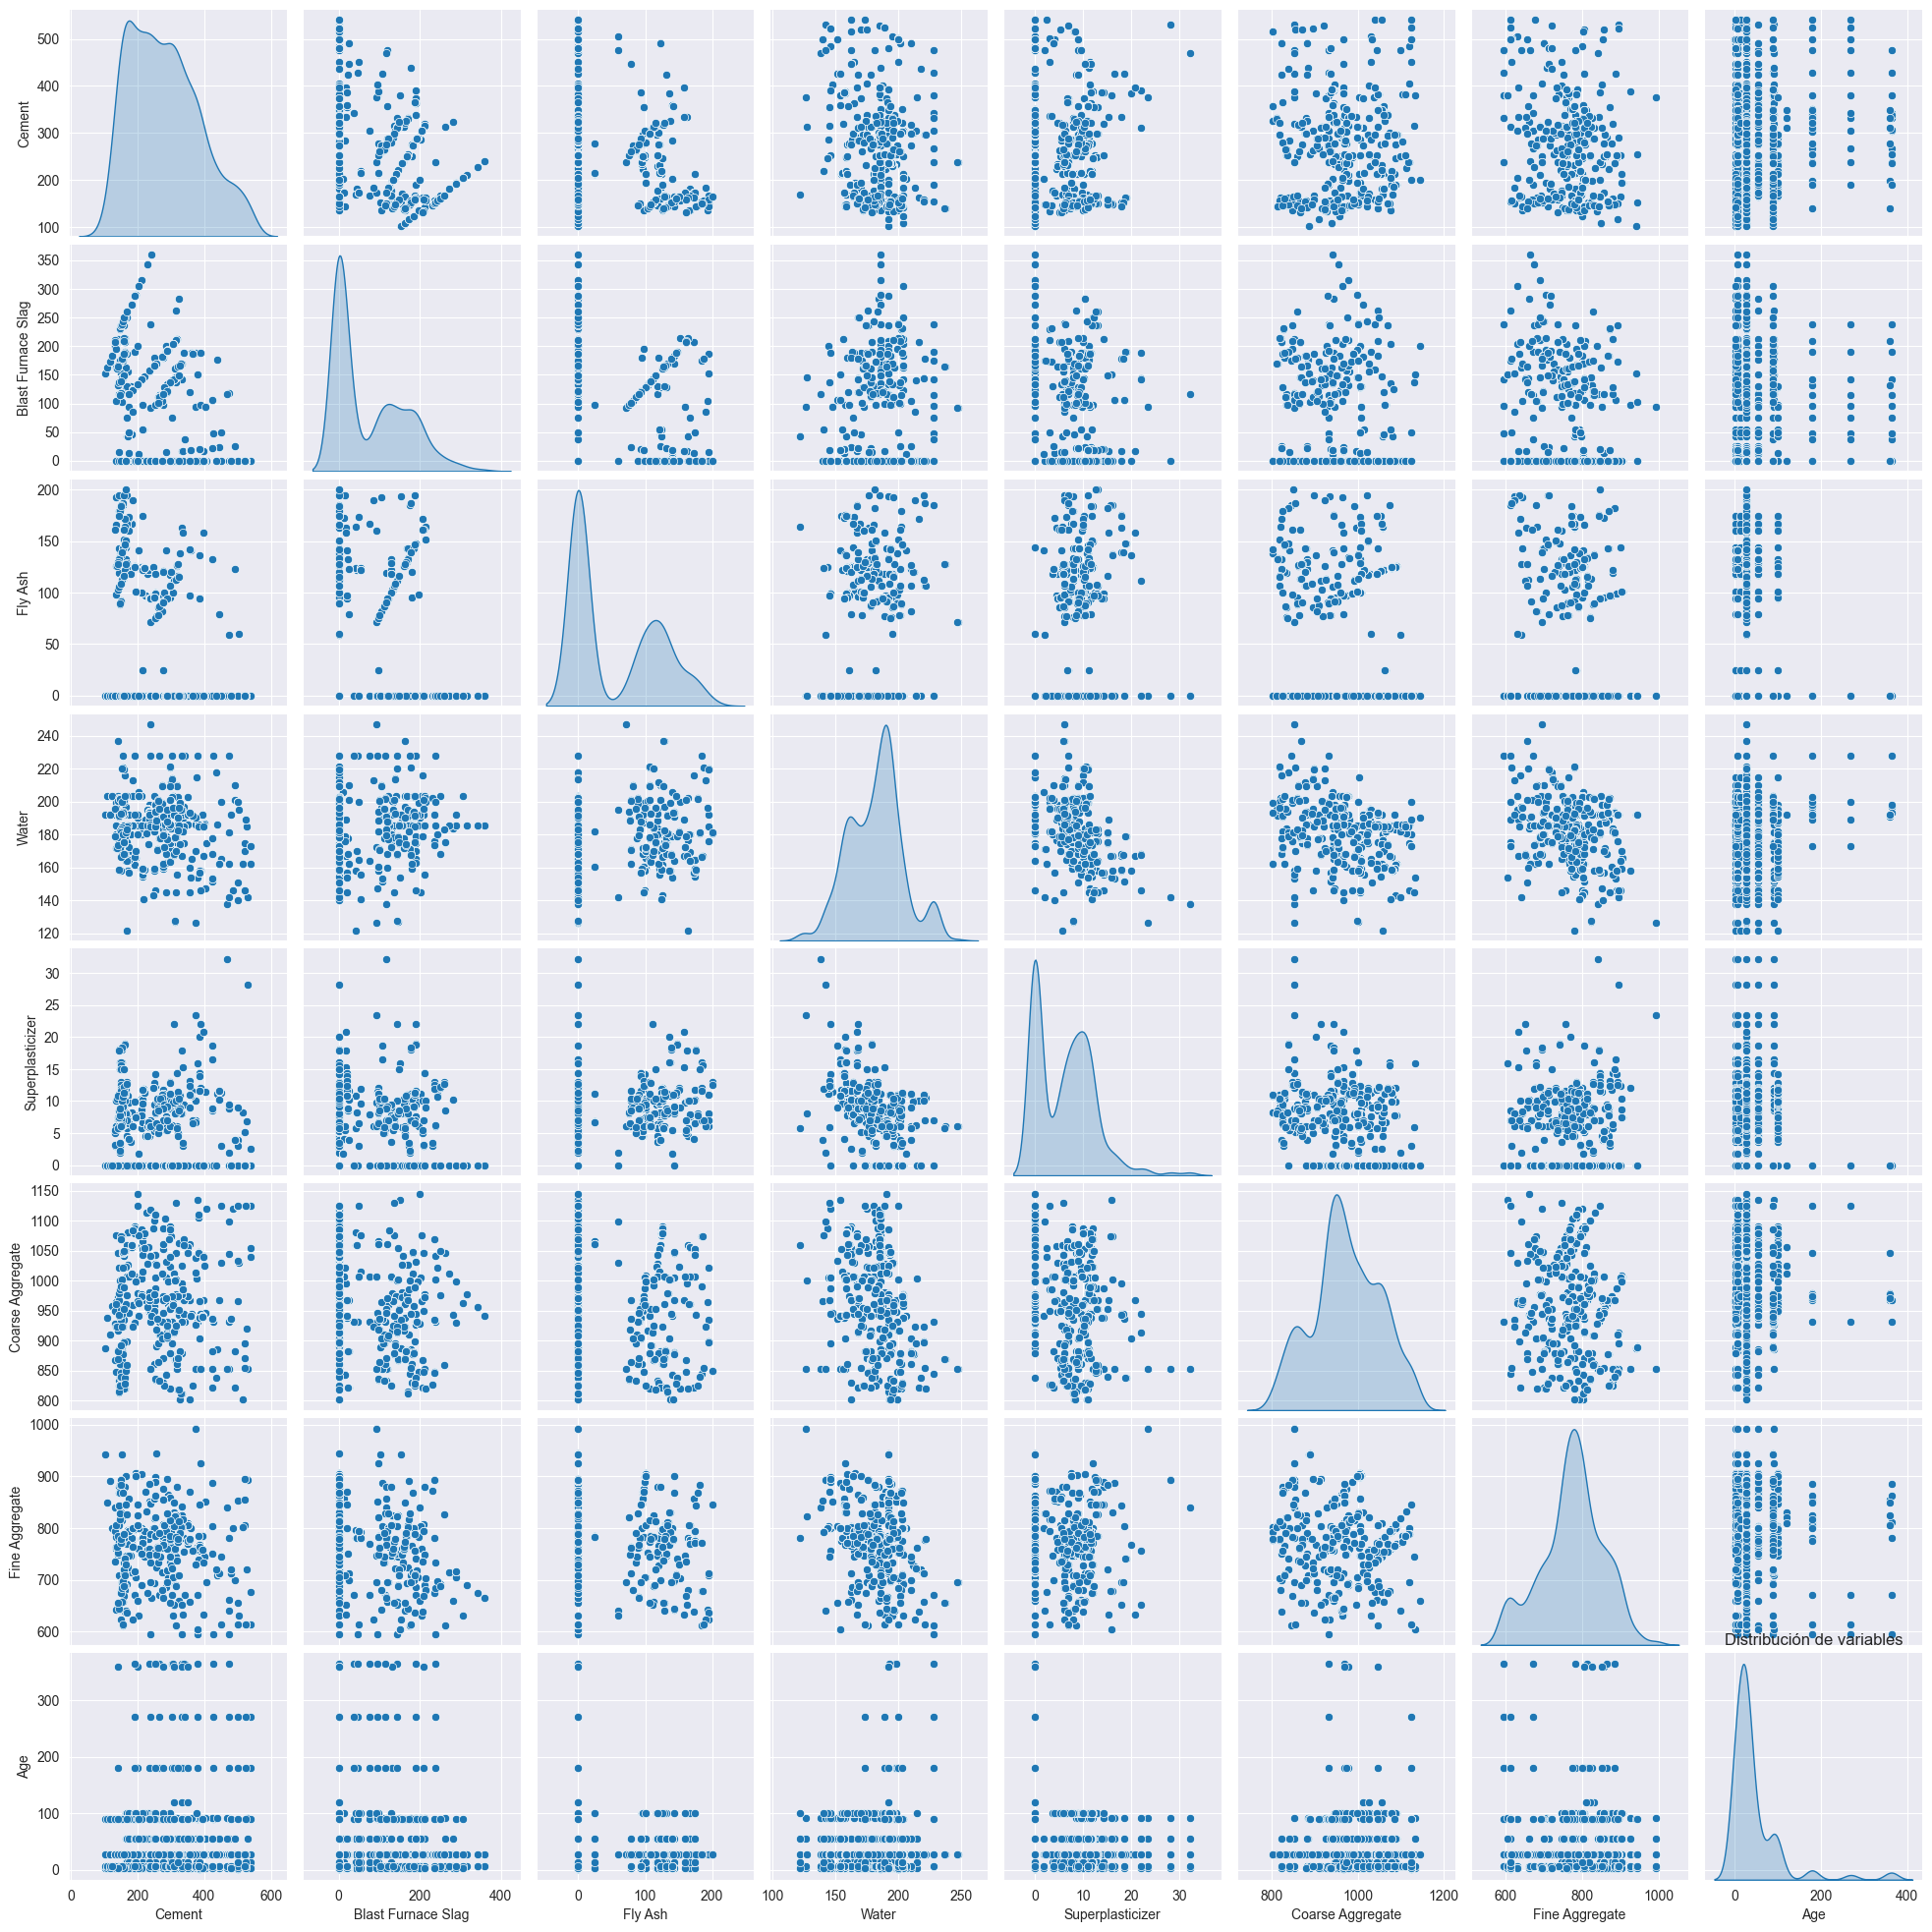

In [8]:
sns.pairplot(data[['Cement','Blast Furnace Slag','Fly Ash','Water','Superplasticizer','Coarse Aggregate','Fine Aggregate','Age']], diag_kind='kde')
plt.title('Distribución de variables')
plt.show()

## Visualización de datos atípicos.

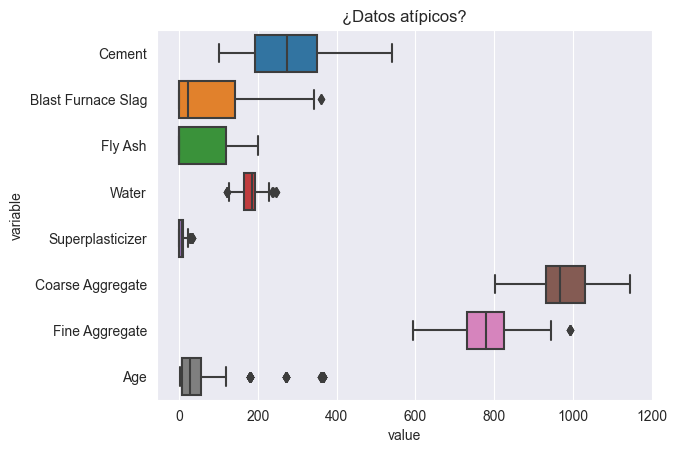

In [9]:
sns.boxplot(x="value", y="variable", data=pd.melt(data.drop(columns=["Strength"])))
plt.title('¿Datos atípicos?')
plt.show()

## Selección de variables método de correlación.

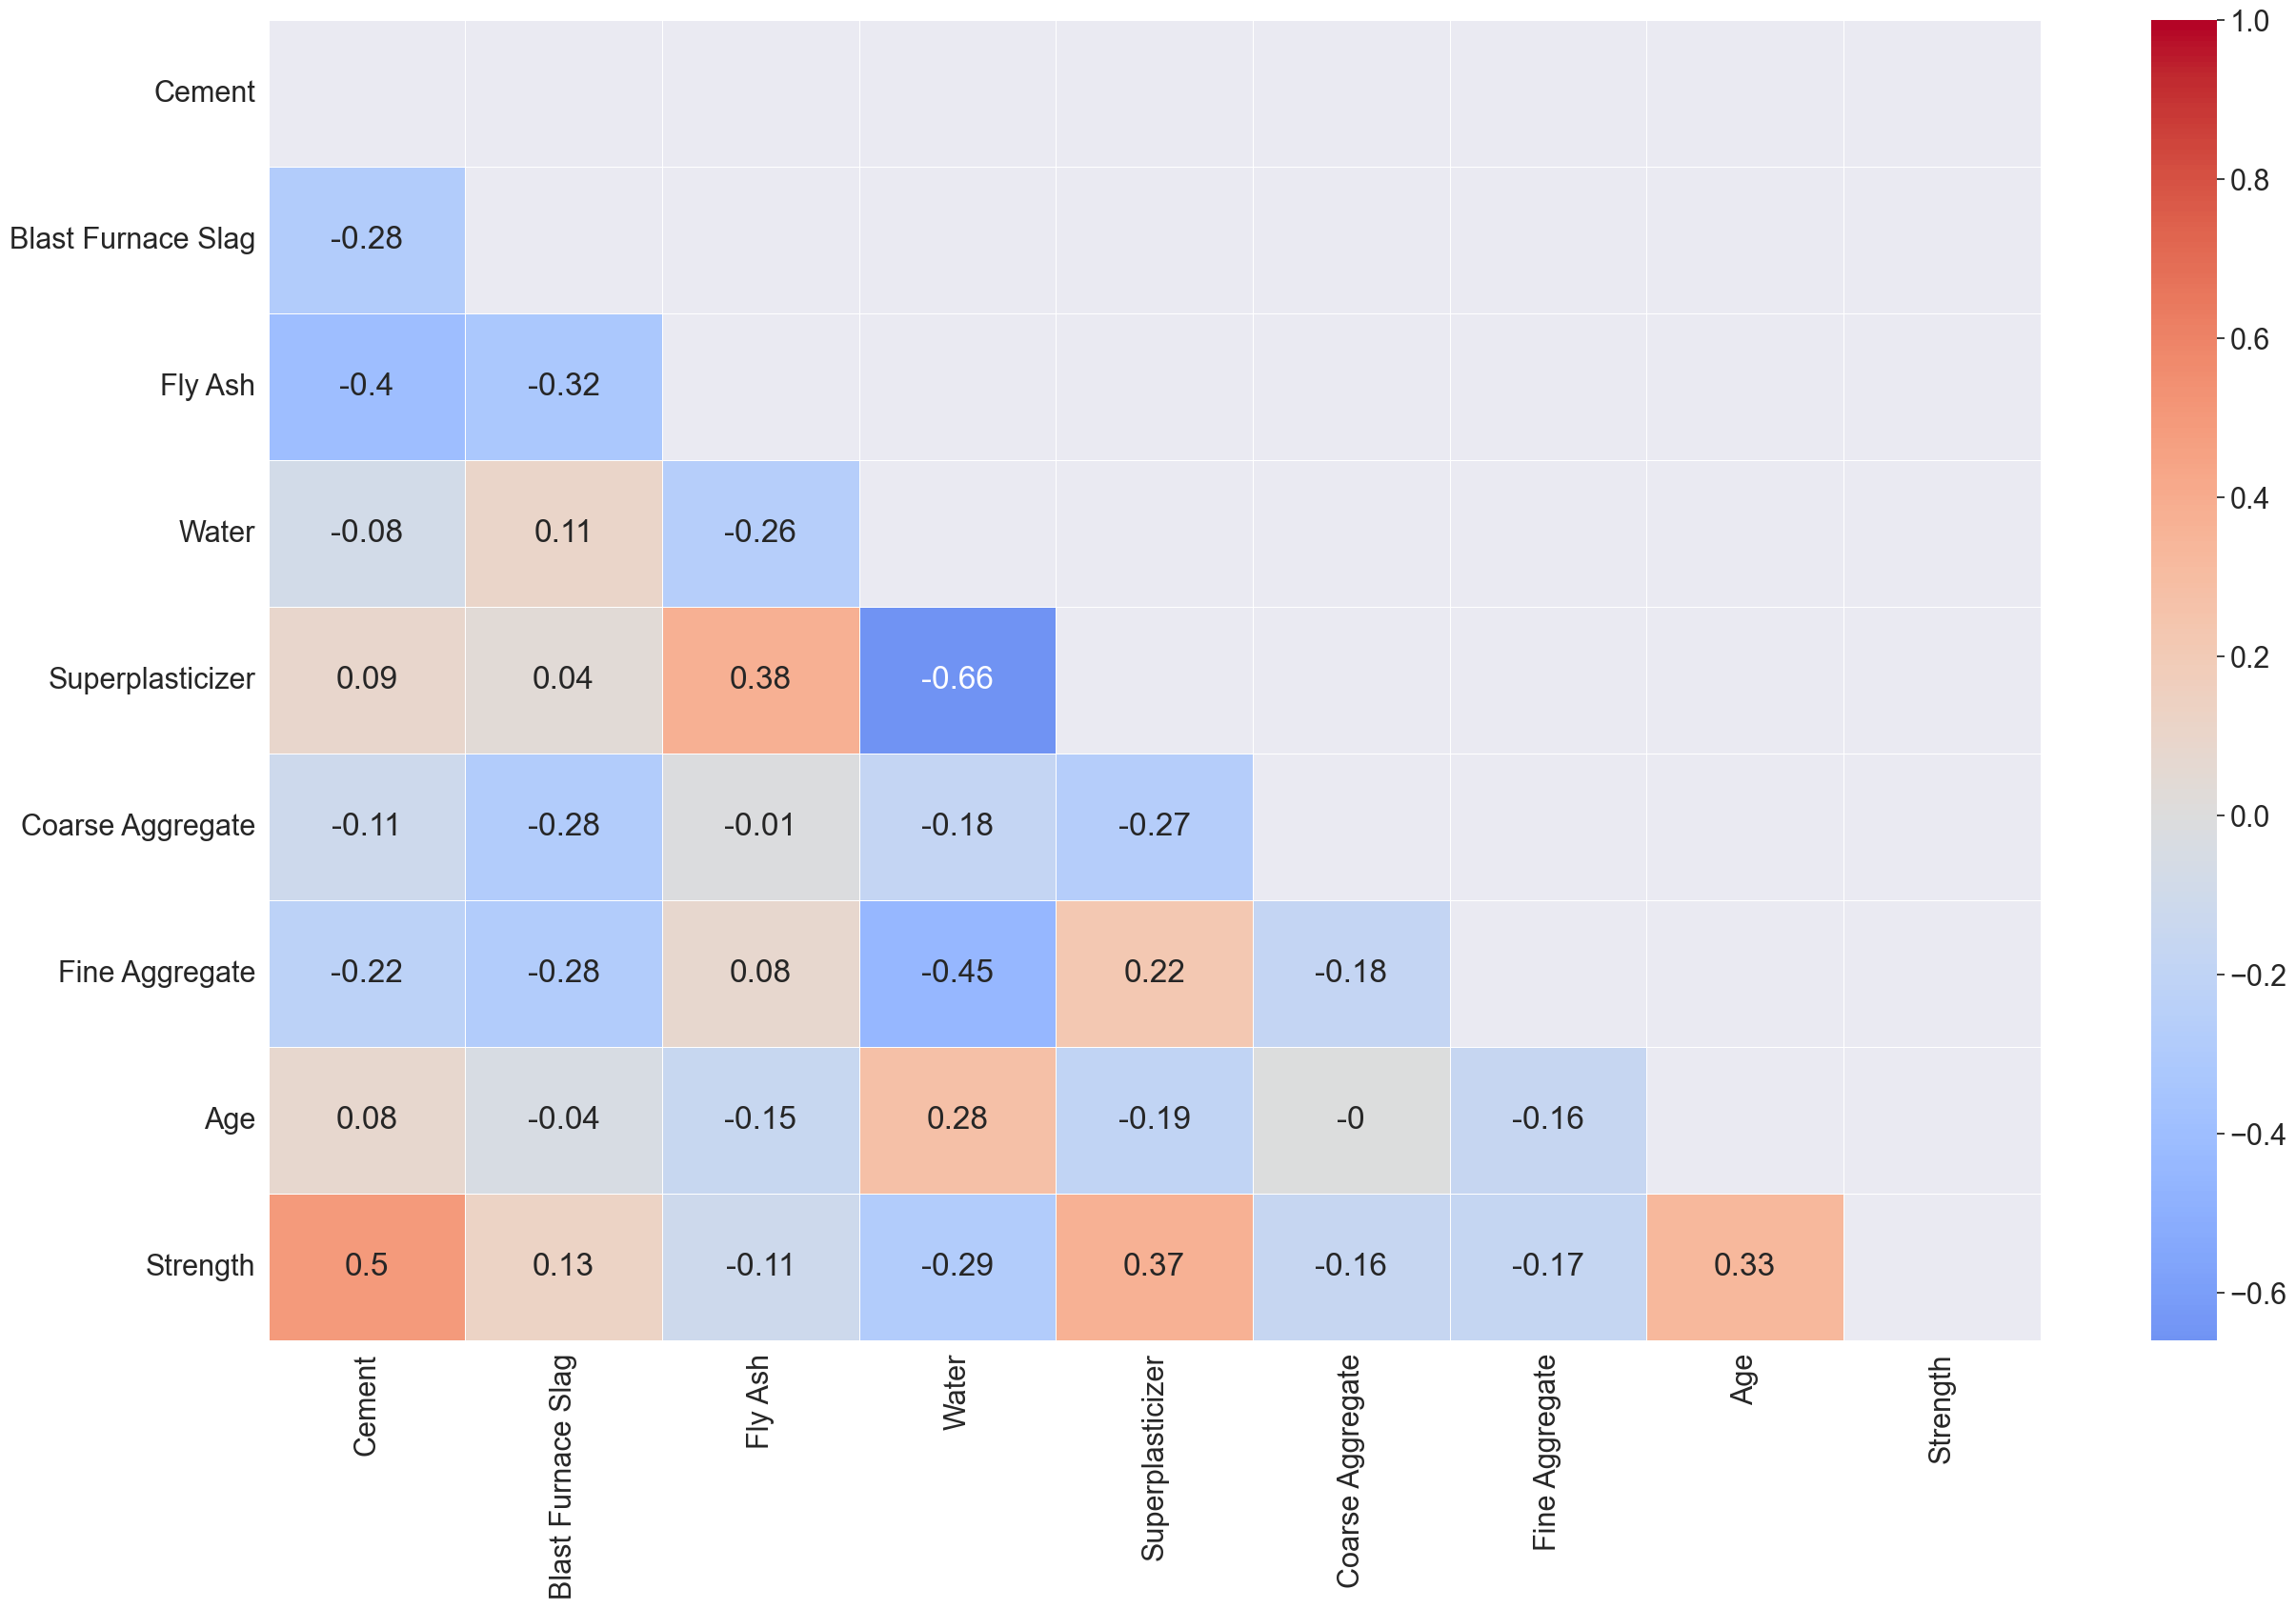

In [18]:
# Correlation matrix of the dataset
corr = data.corr()
# Mask to get only the lower diagonal of the matrix
low_diag = np.triu(corr)
# Set the font size in seaborn graphs
sns.set(font_scale=2)
plt.figure(figsize=(30,18))
sns.heatmap(data=corr.round(2), vmax=1, center=0, annot=True, cmap='coolwarm', linewidths=0.5, mask=low_diag)
plt.show()

Las variables con menos correlación son:

- Fly Ash
- Blast Furnance Slag
- Coarse Aggregate
- Fine Aggregate

Las eliminamos para el modelado de los datos.

In [48]:
data_model = data.drop(columns=["Fly Ash","Blast Furnace Slag","Coarse Aggregate", "Fine Aggregate"])

X_train, X_test, y_train, y_test = train_test_split(data_model.drop(columns=["Strength"]),
                                                    data_model["Strength"],
                                                    test_size=0.2,
                                                    random_state=69)

print(f"Nuestro dataset de entrenamiento tiene un tamaño de {X_train.shape[0]} filas")

Nuestro dataset de entrenamiento tiene un tamaño de 824 filas


## Modelado


---
### SVM

In [49]:
kfold = KFold(n_splits=5, random_state=69, shuffle=True)
#proponer malla para el gridsearch
tuned_parameters = [{'kernel': ['rbf'],
                     'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

model = SVR()

gs = GridSearchCV(model,
                  tuned_parameters,
                  cv=kfold,
                  scoring='neg_mean_squared_error')

gs.fit(X_train, y_train)

print(gs.best_params_)

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


In [50]:
model_svr = SVR(kernel='rbf', C=100, gamma=0.001)
model_svr.fit(X_train, y_train)
yhat = model_svr.predict(X_test)
R2_score = r2_score(y_test,yhat)
print('R2:', R2_score)

R2: 0.7620067213899577


### Random Forest

In [51]:
kfold = KFold(n_splits=5, random_state=69, shuffle=True)
model_randomF = RandomForestRegressor(min_samples_leaf=1,
                               max_features='auto',
                               bootstrap=True,
                               oob_score=False,
                               random_state=0,
                               verbose=0)

# Grid search para optimizar hiperparámetros
gs_randomF = GridSearchCV(model_randomF,
                  param_grid = {'max_depth': range(1, 11),
                                'min_samples_split': range(10, 60, 10),
                                'n_estimators': [100, 300, 500, 800],
                                'criterion': ['mse']},
                  cv=kfold,
                  scoring='neg_mean_squared_error')

gs_randomF.fit(X_train, y_train)
print(gs_randomF.best_params_)

C:\Users\paulo\OneDrive\Documentos\SelloRojo\ProcesoRutasOptimas\venv\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\paulo\OneDrive\Documentos\SelloRojo\ProcesoRutasOptimas\venv\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\paulo\OneDrive\Documentos\SelloRojo\ProcesoRutasOptimas\venv\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\paulo\OneDrive\Documentos\SelloRojo\ProcesoRutasOptima

{'criterion': 'mse', 'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 800}


In [53]:
model_RF = RandomForestRegressor(n_estimators=800,
                               criterion='mse',
                               max_depth=10,
                               min_samples_split=10,
                               min_samples_leaf=1,
                               max_features='auto',
                               bootstrap=True,
                               oob_score=False,
                               random_state=0,
                               verbose=0)
#Entreno modelo optimizado
model_RF.fit(X_train, y_train)

yhat = model_RF.predict(X_test)
R2_score_rf = r2_score(y_test,yhat)
print('R2:', R2_score_rf)

C:\Users\paulo\OneDrive\Documentos\SelloRojo\ProcesoRutasOptimas\venv\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\paulo\OneDrive\Documentos\SelloRojo\ProcesoRutasOptimas\venv\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


R2: 0.8362918376049743


### Árbol de decisión.

In [54]:
model_tree_gs = DecisionTreeRegressor()

gs = GridSearchCV(model_tree_gs,
                  param_grid = {'max_depth': range(1, 11),
                                'min_samples_split': range(10, 60, 10)},
                  cv=5,
                  scoring='neg_mean_squared_error')

gs.fit(X_train, y_train)
print(gs.best_params_)

{'max_depth': 7, 'min_samples_split': 20}


In [56]:
# Crear modelo usando parámetros óptimos
model_tree = DecisionTreeRegressor(max_depth=7,
                                  min_samples_split=20)
model_tree.fit(X_train, y_train)

yhat = model_tree.predict(X_test)
R2_score_tree = r2_score(y_test,yhat)
print('R2:', R2_score_tree)

R2: 0.7691766654374343


### Neural Network


In [104]:
# Diseño del modelo
model_NN = Sequential()
# Capa Input
model_NN.add(Dense(50, activation='relu', input_dim=4, name='input_layer'))
# Capa Oculta
model_NN.add(Dense(60, activation='relu', name='hidden_layer'))
#Agregamos la capa de salida
model_NN.add(Dense(1, activation='linear',name='output_layer'))

# Compilamos el modelo
model_NN.compile(loss='mean_squared_error',
                optimizer="adam",
                metrics = ['mse'])

In [105]:
#Ajustamos el modelo
history = model_NN.fit(X_train, y_train,
                   epochs=200,
                   batch_size=100,
                   validation_data=(X_test,y_test))

Epoch 1/200
9/9 [==============================] - 1s 24ms/step - loss: 1558.3033 - mse: 1558.3033 - val_loss: 650.6246 - val_mse: 650.6246
Epoch 2/200
9/9 [==============================] - 0s 6ms/step - loss: 727.2569 - mse: 727.2569 - val_loss: 278.8832 - val_mse: 278.8832
Epoch 3/200
9/9 [==============================] - 0s 8ms/step - loss: 268.0151 - mse: 268.0151 - val_loss: 304.8948 - val_mse: 304.8949
Epoch 4/200
9/9 [==============================] - 0s 5ms/step - loss: 244.7746 - mse: 244.7746 - val_loss: 158.1529 - val_mse: 158.1529
Epoch 5/200
9/9 [==============================] - 0s 6ms/step - loss: 208.7694 - mse: 208.7694 - val_loss: 165.4795 - val_mse: 165.4795
Epoch 6/200
9/9 [==============================] - 0s 9ms/step - loss: 184.5842 - mse: 184.5842 - val_loss: 161.8304 - val_mse: 161.8304
Epoch 7/200
9/9 [==============================] - 0s 7ms/step - loss: 180.1580 - mse: 180.1580 - val_loss: 146.6713 - val_mse: 146.6713
Epoch 8/200
9/9 [=====================

In [106]:
yhat = model_NN.predict(X_test)
R2_score_NN = r2_score(y_test, yhat)
print('R2:', R2_score_NN)

7/7 [==============================] - 0s 2ms/step
R2: 0.7635720636193631


In [107]:
# Diseño del modelo
model_NN_2 = Sequential()
# Capas de input
model_NN_2.add(Dense(50, activation='relu', input_dim=4, name='input_layer'))
# Capas ocultas
model_NN_2.add(Dense(70, activation='relu', name='hidden_layer'))
model_NN_2.add(Dense(60, activation='relu', name='hidden_layer_2'))
#Agregamos la capa de salida
model_NN_2.add(Dense(1, activation='linear',name='output_layer'))

model_NN_2.compile(loss='mean_squared_error',
                    optimizer="adam",
                    metrics = ['mse'])

In [108]:
#Ajustamos el modelo
history_2 = model_NN_2.fit(X_train, y_train,
                   epochs=200,
                   batch_size=100,
                   validation_data=(X_test,y_test))

Epoch 1/200
9/9 [==============================] - 1s 28ms/step - loss: 544.3389 - mse: 544.3389 - val_loss: 292.7815 - val_mse: 292.7815
Epoch 2/200
9/9 [==============================] - 0s 8ms/step - loss: 255.9659 - mse: 255.9659 - val_loss: 191.1124 - val_mse: 191.1124
Epoch 3/200
9/9 [==============================] - 0s 7ms/step - loss: 175.6165 - mse: 175.6165 - val_loss: 143.4513 - val_mse: 143.4513
Epoch 4/200
9/9 [==============================] - 0s 8ms/step - loss: 152.7796 - mse: 152.7796 - val_loss: 127.6848 - val_mse: 127.6848
Epoch 5/200
9/9 [==============================] - 0s 9ms/step - loss: 135.5987 - mse: 135.5988 - val_loss: 124.0187 - val_mse: 124.0187
Epoch 6/200
9/9 [==============================] - 0s 8ms/step - loss: 122.1377 - mse: 122.1377 - val_loss: 116.9480 - val_mse: 116.9480
Epoch 7/200
9/9 [==============================] - 0s 8ms/step - loss: 115.4222 - mse: 115.4222 - val_loss: 107.9054 - val_mse: 107.9054
Epoch 8/200
9/9 [=======================

In [109]:
yhat = model_NN_2.predict(X_test)
R2_score_NN_2 = r2_score(y_test, yhat)
print('R2:', R2_score_NN_2)

7/7 [==============================] - 0s 1ms/step
R2: 0.7810209561598559


## Interpretación de resultados

In [111]:
results={
    'Modelo':
       ['SVM','Tree Regressor','Random Forest', "NN", "NN_2"],
   'R2':
       [R2_score, R2_score_tree, R2_score_rf, R2_score_NN, R2_score_NN_2]}

results = pd.DataFrame(results)
results

,Modelo,R2
0,SVM,0.762007
1,Tree Regressor,0.769177
2,Random Forest,0.836292
3,NN,0.763572
4,NN_2,0.781021


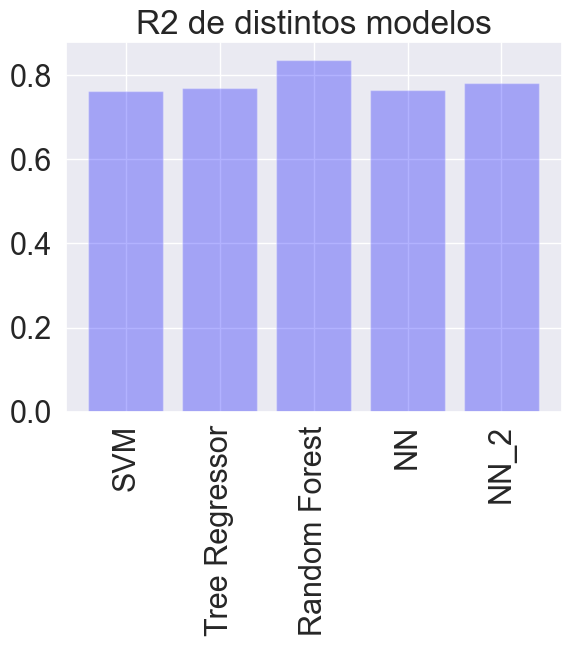

In [114]:
variables = list(results["Modelo"])
plt.bar(list(results["Modelo"]), list(results["R2"]), color="blue", alpha=0.3)
plt.title('R2 de distintos modelos')
plt.xticks(rotation=90)
plt.show()

## Guardando el mejor modelo.
El modelo que mejor rendimiento tuvo fue el Random Forest. Lo guardamos como pickle para poder importarlo en la aplicación.

In [115]:
import pickle
filename = 'rf_regressor.pkl'
pickle.dump(model_RF, open(filename,'wb'))